In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import os
import ast

from historical_geocoder import extractor
from historical_geocoder import geocoder

import geopy
from geopy.distance import geodesic
import shapely.geometry
from shapely.geometry import MultiPolygon, Polygon
from itertools import combinations

import matplotlib.pyplot as plt


# Set prompt and other parameters

In [2]:
prompt = """
I would like you to take on the roles of both a Geographer and a Historian. 
You possess extensive knowledge in Chinese geography and history, with a particular expertise in historical toponymy. 
Your task is to extract precise addresses of historical locations from texts.
When I provide a scholarly text analyzing the location of one or several ancient place names, please identify and extract both the ancient place names and their corresponding locations from the text. 
Keep the following in mind:
1. If the text presents differing opinions of the same place name's location from various scholars, only extract the most correct location that the author of the text acknowledges or agrees with. Do not include information that the author disputes.
2. If an ancient name is mentioned in the text but no location is provided, please do not extract the information for this place name.
3. Present the extracted information always in Chinese and strictly adhere to the following format:
   "Place Name 1", "Location 1"
   "Place Name 2", "Location 2"
   Please do not include any explanation, verb or extraneous information.

The text is as follows:

         """

In [ ]:
api_key = ""

In [3]:
models = ["chatgpt"]
chatgpt_model_versions = ["gpt-3.5-turbo-1106", "gpt-4-1106-preview"]

# Create extractor and run

In [4]:
llm_extractor = extractor.Extractor(prompt, output_dir="./evaluation/", 
                                    model="chatgpt", model_version="gpt-3.5-turbo-1106", api_key=api_key)

In [11]:
df = pd.read_csv('./evaluation/input.csv')
texts = df['text'].tolist()

In [6]:
results = llm_extractor.extract_texts(texts)

Extracting text 0 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 1 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 2 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 3 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 4 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 5 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 6 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 7 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 8 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 9 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 10 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-1106.json
Extracting text 11 to ./evaluation/extracted_results_chatgpt_gpt-3.5-turbo-

In [7]:
llm_extractor = extractor.Extractor(prompt, output_dir="./evaluation/", 
                                    model="chatgpt", model_version="gpt-4-1106-preview", api_key=api_key)

In [6]:
import json
with open('./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json', 'r', encoding='utf-8-sig') as f:
    results = json.load(f)

In [15]:
texts

['此为最早明确见于文献记载中的楚县，亦是春秋置县之首例。权本为子姓小国，后为楚武王所灭，并被改建为县。《左传》庄公十八年载：“初，楚武王克权，使斗缗尹之。”斗缗为楚国大夫，“尹之”，就是以斗缗为权县的长官，来管理县内的有关事务。楚武王在位时间为公元前740年至前690年。《水经·沔水注》曰：“沔水自荆城东南流，迳当阳县之章山东，山上有故城，太尉陶侃伐杜曾所筑也。……沔水又东，右会权口，水出章山，东南流权城北，古之权国也。”《大清一统志》卷342安陆府古迹权城下亦云：“在钟祥县西南。”是权县当位于今湖北省荆门县东南。杨伯峻《春秋左传注》以为在今湖北省当阳县东南，恐非，当是将古当阳县（位于今荆门县西南）与今当阳县错混而致误。后斗缗据权县而叛楚，楚武王率军“围而杀之”。随后“迁权于那处，使阎敖尹之”(《左传》庄公十八年)，即楚武王把权县原有的臣民迁往“那处”，并在那处设县，让阎敖为县尹，负责那处的地方政务。又，徐少华认为“迁权于那处”的应是指权国旧贵族及部分平民，在权县当仍有大多数平民留于当地而为县民，不可能全面迁走而使权成为弃地，权县仍当继续存在。其说恐未必与当时的事情发展相符。因权与那处颇近，权迁那处后，权已演变为一居民点，即一般的楚邑，而权县应当不复存在了。',
 '《汉书·地理志》（以下简称《汉志》）南阳郡湖阳县下班固自注曰：“故廖国也。”廖或作蓼、飂，为祝融八姓之一，春秋时其地在今河南省唐河县西南，与在今河南省固始县东北的姬姓蓼国同名而异地，后者穆王五年(《左传》文公五年，前622)灭于楚。《左传》哀公十七年（前478）载：“（楚大夫）子谷曰：‘观丁父，都俘也，武王以为军率，是以克州、蓼、服随、唐，大启群蛮……’”据此可知蓼当于楚武王时为楚所灭。又《水经·比水注》曰：“其水西南流湖阳县故城南，《地理志》曰：故廖国也。《竹书纪年》曰：楚共王会宋平公于湖阳者矣。”是楚共王时蓼国故地已称湖阳，徐少华依照春秋楚灭国多设县之例，据此推测楚武王灭蓼后不久，即在其故地置县，并改称湖阳，汉湖阳县当因楚县旧制而来。其说应是，今从之。',
 '邓本为西周曼姓小国，其地当在今湖北省襄樊市西北，江永《春秋地理考实》卷1、杨伯峻《春秋左传注》等认为在今河南省邓州市，不确。1974年，在襄阳山湾墓地出土了《邓公乘鼎》，该鼎的器身及盖上有如下相同的铭文：“邓公乘自作緐，其眉寿无期，永保用之

In [7]:
results

{'0': '权县,今湖北省荆门市东南',
 '1': '廖国,河南省唐河县西南\n蓼国,河南省固始县东北',
 '2': '邓,湖北省襄阳市',
 '3': '申国,河南省南阳市',
 '4': '吕,河南省南阳市西\n申,河南省南阳市西',
 '5': '息县,今河南省息县西南',
 '6': '商县,今湖北省均县附近',
 '7': '期思,河南省固始县东北、史灌河以东近淮河南岸',
 '8': '析,今河南省西峡县\n白羽,析',
 '9': '庐,湖北省襄阳市',
 '10': '商密,今河南省淅川县西南\n宜城,今湖北省宜城县东南',
 '11': '上庸,湖北省竹山县西南',
 '12': '宛丘,今河南省淮阳县',
 '13': '沈县,今安徽省临泉县\n沈国,今河南省平舆县北',
 '14': '城父,河南省襄城县西（即宝丰县东）\n成公乾,河南省襄城县西（即宝丰县东）',
 '15': '郧,今湖北省京山、钟祥二县之间\n竟陵县,今湖北省钟祥县北境',
 '16': '州来,安徽省凤台县\n下蔡,安徽省凤台县',
 '17': '叶县,今河南省叶县南\n许国,今河南省许昌市东',
 '18': '陈,河南省周口市淮阳区\n蔡,河南省驻马店市遂平县\n东不羹,河南省舞阳县西北\n西不羹,河南省襄城县东南',
 '19': '蔡叔之蔡,河南省修武县以西地带\n蔡仲之蔡,河南省上蔡县城关一带\n新蔡,河南省新蔡县西',
 '20': '白县,河南省息县东北或淮滨县西南\n鄢,河南省漯河市东',
 '21': '巢,今六安县东北\n钟离,今安徽省凤阳县东北',
 '22': '钟离,安徽省凤阳县东北临淮关',
 '23': '阴县,今湖北省老河口北',
 '24': '棠县,今江苏省六合县西北',
 '25': '武城,河南省信阳市东北',
 '26': '成臼,今湖北省钟祥县南之旧口\n蓝县,今湖北省钟祥县西北',
 '27': '苦县,今河南省鹿邑县东',
 '28': '荀,山西省新绛县东北\n荀城,河东',
 '29': '耿,山西省河津县东南\n魏,山西省芮城县北',
 '30': '州,今河南省温县东北',
 '31': '原,今河南省济源市西北',
 '32': '温,河南省温县西南\n原,未明确\n缔,未明确\n樊,未明确\n隰郕,未明确

In [8]:
results = llm_extractor.extract_texts(texts)

Extracting text 0 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 1 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 2 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 3 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 4 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 5 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 6 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 7 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 8 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 9 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 10 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-preview.json
Extracting text 11 to ./evaluation/extracted_results_chatgpt_gpt-4-1106-pre

# Post-processing

In [37]:
def json_to_dataframe(json_file):
    with open(json_file, 'r', encoding="utf-8-sig") as f:
        data = json.load(f)
    df = pd.DataFrame(columns=['id', 'toponym', 'location'])
    for key, value in data.items():
        result = value.split('\n')
        for item in result:
            if item != '':
                try:
                    row = {'id': key, 'toponym': item.split(',')[0].strip(), 'location': item.split(',')[1].strip()}
                except:
                    row = {'id': key, 'toponym': item, 'location': ''}
                df.loc[len(df)] = row
    return df


def match_ids(df_result, df_original):
    df_ids = df_original[['id']].copy()

    df_result.set_index('id', inplace=True)
    df_result.index.name = None
    df_ids.index = df_ids.index.astype('int64')
    df_result.index = df_result.index.astype('int64')

    df_result = df_result.merge(df_ids, left_index=True, right_index=True, how='left')
    df_result = df_result[['id', 'toponym', 'location']]
    return df_result

In [38]:
df_original = pd.read_csv('./evaluation/input.csv')

json_dir = './evaluation/'
json_files = [i for i in os.listdir(json_dir) if i.endswith('.json')]

for json_file in json_files:
    df_result = json_to_dataframe(json_dir + json_file)
    df_result = match_ids(df_result, df_original)
    df_result.to_csv(json_dir + json_file[:-5] + '.csv', index=False, encoding='utf-8-sig')

# Geocoding

In [3]:
files_dir = './evaluation/'
files = [i for i in os.listdir(files_dir) if "extracted_results" in i and i.endswith('.csv')]
for file in files:
    df = pd.read_csv(files_dir + file, encoding='utf-8-sig')
    addresses = df['location'].tolist()
    geocoder_evaluate = geocoder.Geocoder(addresses, 
                                         lang="ch", 
                                         projection_crs="EPSG:2333", 
                                         address_separator="-")
    geocoder_evaluate.match_address()
    geocoder_evaluate.detect_direction()
    geocoder_evaluate.calculate_point()
    df_geocoded = geocoder_evaluate.data.reset_index().copy()
    df = df.reset_index().copy()
    df = df.merge(df_geocoded, left_index=True, right_index=True, how='left')
    df.to_csv(files_dir + file[:-4] + '_geocoded.csv', index=False, encoding='utf-8-sig')

# Evaluate

$$ 
closeness(x) = \begin{cases} \frac{\cos{(\frac{\pi}{n} \cdot x) + 1 }}{2} &, \ if \ 0 \le x \le n \\0 &, \ if \ x \gt n \end{cases} 
$$

$$
\text{Precision} = \frac{1}{T} \sum_{i=1}^{T} \left( \frac{1}{E_i} \sum_{j=1}^{E_i} C_{ij} \right)
$$


The Precision is calculated as the average of the average closeness scores for locations extracted from each text in the dataset. 
Here, $T$ represents the total number of texts in the dataset. 
For each text, denoted as i, there is a set of locations extracted from it, and $E_i$ is the number of locations extracted from text i.
$C_{ij}$ represents the closeness score of location j in text i. 

$$
\text{Recall} = \frac{1}{T} \sum_{i=1}^{T} \left( \frac{1}{G_i} \sum_{j=1}^{G_i} \left( \frac{1}{E_{ij}} \sum_{k=1}^{E_{ij}} C_{ijk} \right) \right)
$$

The Recall is calculated as the average of the average of the average closeness scores for extracted locations matched with each ground truth location from each text in the dataset. 
Here, $T$ represents the total number of texts in the dataset. 
For each text, denoted as i, there is a set of ground truth locations, and $G_i$ is the number of ground truth locations in text i. 
For each ground truth location, denoted as j, there is one or a set of locations extracted by the model, and $E_{ij}$ represents the number of extracted locations matched with ground truth location ij.
$C_{ijk}$ represents the closeness score of extracted location k matched with ground truth location j in text i.


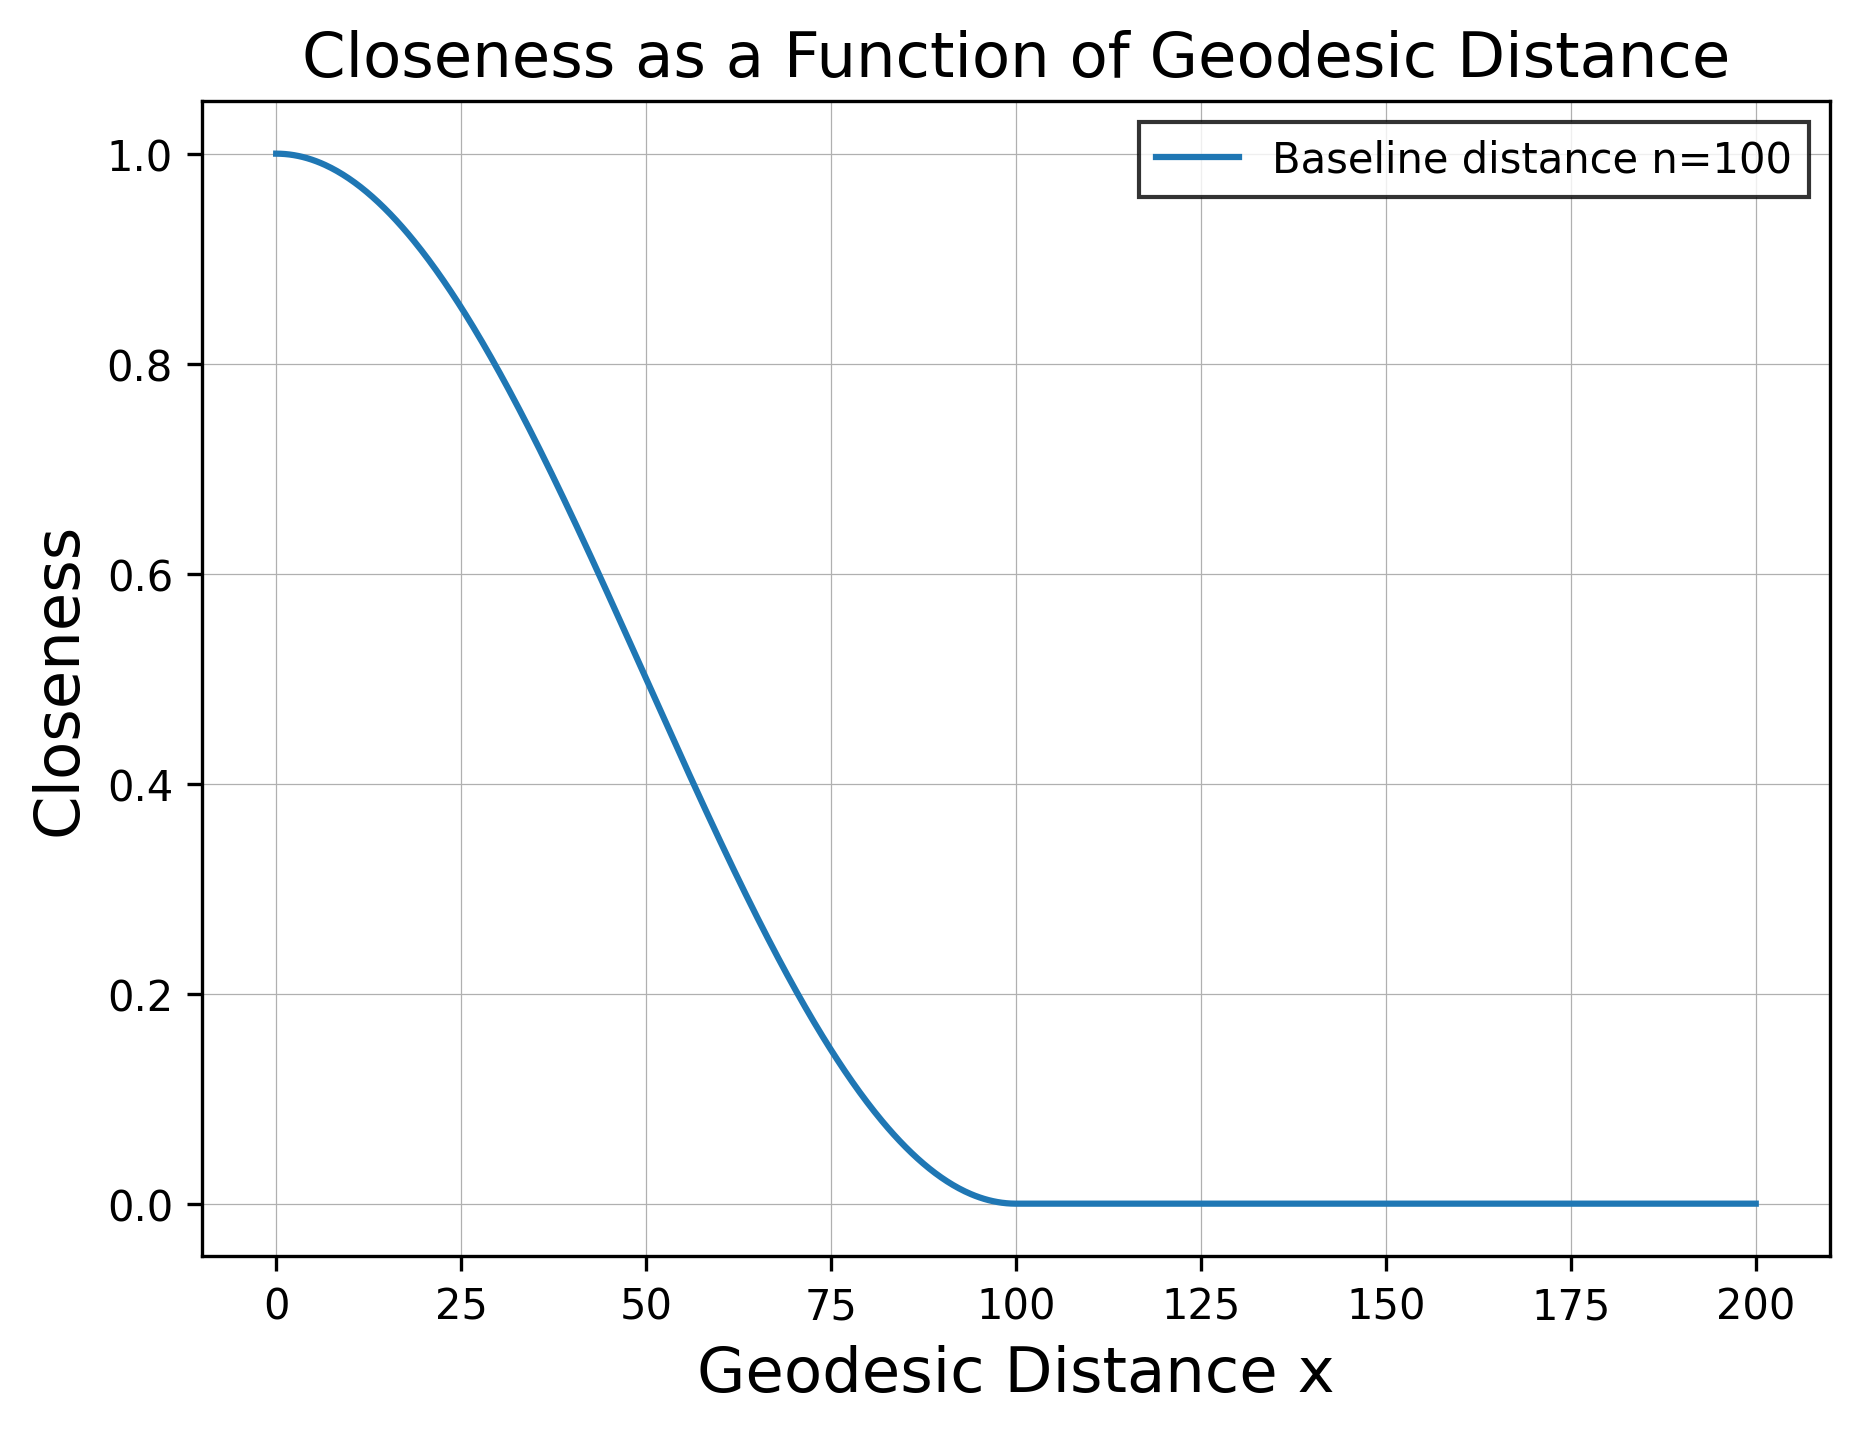

In [2]:
def closeness(x, n):
    """
    Calculate the closeness of the extracted result to the benchmark result
    :param x (km): geodesic distance between the extracted point and the benchmark point
    :param n (km): baseline distance (max geodesic distance inside the most accurate level polygon of the benchmark data)
    """
    if x <= n:
        return (np.cos(x*(np.pi/n))+1)/2
    else:
        return 0

n = 100  # Baseline distance decided by the max length of the most accurate level polygon of the benchmark data
x_values = np.linspace(0, 2*n, 1000)  # x from 0 to 2 times the baseline distance


# Calculate closeness values
closeness_values = [closeness(x, n) for x in x_values]

# Plotting
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(x_values, closeness_values, label=f'Baseline distance n={n}')
plt.xlabel('Geodesic Distance x', fontsize=15)
plt.ylabel('Closeness', fontsize=15)
plt.title('Closeness as a Function of Geodesic Distance', fontsize=15)
plt.grid(True, linestyle='-', linewidth=0.3)
plt.legend(fancybox=False, edgecolor='black')
plt.show()


In [21]:
def shapely_point_to_geopy(point_shapely):
    return (point_shapely.y, point_shapely.x)


def calculate_max_distance_in_polygon(polygon):
    max_distance = 0

    if isinstance(polygon, Polygon):
        polygons = [polygon]
    elif isinstance(polygon, MultiPolygon):
        polygons = [p for p in polygon.geoms]

    for poly in polygons:
        points = np.array(poly.exterior.coords)
        points = points[:, [1, 0]]  # Swap coordinates for geodesic calculations
        for i, point1 in enumerate(points):
            for point2 in points[i+1:]:
                distance = geodesic(point1, point2).kilometers
                max_distance = max(max_distance, distance)

    return max_distance


def calculate_geo_closeness(point1, point2, base_polygon):
    # Geodesic Distance between two points
    point1, point2 = shapely_point_to_geopy(point1), shapely_point_to_geopy(point2)
    distance =  geodesic(point1, point2).kilometers
    # Max distance inside the most accurate level polygon of the benchmark data
    n = calculate_max_distance_in_polygon(base_polygon)
    # Closeness
    closeness_value = closeness(distance, n)
    return closeness_value


def calculate_geo_closeness_for_all_text(gdf_result, gdf_benchmark, gdf_database):
    # Check if the number of unique ids in the result is the same as the benchmark
    if len(gdf_result['id'].unique()) != len(gdf_benchmark['id'].unique()):
        print("Number of unique ids in the result is not the same as the benchmark")
    else:
        gdf_result['closeness'] = 0
        gdf_result['target_toponym'] = None
        # Iterate through each text (section)
        for id in gdf_benchmark['id'].unique():
            gdf_section_benchmark = gdf_benchmark[gdf_benchmark['id'] == id]
            gdf_section_result = gdf_result[gdf_result['id'] == id]

            # Iterate through each extracted toponym
            for index_result, row_result in gdf_section_result.iterrows():
                result_toponym = row_result['toponym'].replace("县", "").replace("国", "")
                for index_benchmark, row_benchmark in gdf_section_benchmark.iterrows():
                    benchmark_toponym = row_benchmark['name_response'].replace("县", "").replace("国", "")
                    print(id, result_toponym, benchmark_toponym)
                    if benchmark_toponym in result_toponym or result_toponym in benchmark_toponym:
                        gdf_result.loc[index_result, 'target_toponym'] = benchmark_toponym
                        if row_result['geometry'] is None or row_result['geometry'].is_empty:
                            closeness_value = 0
                        else:
                            if row_benchmark['geometry'] is None or row_benchmark['geometry'].is_empty:
                                # Change in the future
                                closeness_value = 0
                            else:
                                # Get the most accurate level polygon of the benchmark data
                                base_polygon_code = list(ast.literal_eval(row_benchmark['Match Result'])[0].values())[0]
                                base_polygon = gdf_database[gdf_database['CODE'] == base_polygon_code].geometry.iloc[0]
                                closeness_value = calculate_geo_closeness(row_result['geometry'], row_benchmark['geometry'], base_polygon)
                    else:
                        closeness_value = 0
                # Add the closeness score to the result dataframe
                gdf_result.loc[index_result, 'closeness'] = closeness_value

        return gdf_result


def calculate_precision(gdf_result):
    section_precisions = gdf_result.groupby('id')['closeness'].mean()
    total_precision = section_precisions.mean()
    return total_precision


def calculate_recall(gdf_result, gdf_benchmark):

    total_recall = 0
    for id in gdf_result['id'].unique():
        gdf_section_benchmark = gdf_benchmark[gdf_benchmark['id'] == id]
        gdf_section_result = gdf_result[gdf_result['id'] == id]
        section_recall = 0
        for i in range(len(gdf_section_benchmark)):
            benchmark_toponym = gdf_section_benchmark.iloc[i]['name_response'].replace("县", "").replace("国", "")
            if benchmark_toponym not in gdf_section_result['target_toponym'].tolist():
                section_recall += 0
            else:
                section_recall += gdf_section_result[gdf_section_result['target_toponym'] == benchmark_toponym]['closeness'].mean()
        section_recall = section_recall / len(gdf_section_benchmark)
        total_recall += section_recall
    
    total_recall = total_recall / len(gdf_result['id'].unique())

    return total_recall

In [22]:
df_benchmark = pd.read_csv('./evaluation/benchmark.csv', encoding='utf-8-sig')
gdf_benchmark = gpd.GeoDataFrame(df_benchmark, geometry=gpd.points_from_xy(df_benchmark.X, df_benchmark.Y))
gdf_database = gpd.read_file('./data/2020China.geojson', driver='GeoJSON')

In [23]:
file_dir = './evaluation/'
files = [i for i in os.listdir(file_dir) if 'geocoded' in i and i.endswith('.csv')]

for file in files:
    df_result = pd.read_csv(file_dir + file, encoding='utf-8-sig')
    gdf_result = gpd.GeoDataFrame(df_result, geometry=gpd.points_from_xy(df_result.X, df_result.Y))
    gdf_result = calculate_geo_closeness_for_all_text(gdf_result, gdf_benchmark, gdf_database)
    gdf_result.to_file(file_dir + file[:-4] + '_evaluated.geojson', driver='GeoJSON', encoding='utf-8-sig')
    precision = calculate_precision(gdf_result)
    recall = calculate_recall(gdf_result, gdf_benchmark)
    print(file)
    print('Precision:', precision)
    print('Recall:', recall)

1.0 权 ﻿权
1.0 当阳 ﻿权
1.0 章山 ﻿权
1.0 那处 ﻿权
3.0 蓼 湖阳
3.0 湖阳 湖阳
4.0 邓 邓
4.0 邓 邓
5.0 申 ﻿申
5.0 宛城 ﻿申
6.0 吕 吕
6.0 申 吕
7.0 息 ﻿息
7.0 申 ﻿息
8.0 商 商
9.0 蒋 ﻿期思
10.0 析 ﻿析
10.0 白羽 ﻿析
10.0 容城 ﻿析
12.0 庐 ﻿庐
12.0 庐戎 ﻿庐
12.0 庐 ﻿庐
11.0 鄀 鄀
11.0 商密 鄀
11.0 郢 鄀
11.0 番 鄀
11.0 鄢 鄀
13.0 庸 ﻿庸
14.0 宛丘 陈
15.0 沈尹 ﻿沈
15.0 沈 ﻿沈
16.0 城父 ﻿城父
17.0 郧 ﻿郧
17.0 郧 ﻿郧
18.0 州来 州来
19.0 叶 ﻿叶
19.0 许 ﻿叶
20.0 陈 东不羹
20.0 陈 西不羹
20.0 蔡 东不羹
20.0 蔡 西不羹
20.0 不羹 东不羹
20.0 不羹 西不羹
21.0 蔡 上蔡
21.0 蔡 新蔡
21.0 上蔡 上蔡
21.0 上蔡 新蔡
21.0 新蔡 上蔡
21.0 新蔡 新蔡
22.0 白 ﻿白
22.0 白亭 ﻿白
22.0 鄢 ﻿白
22.0 巢邑 ﻿白
23.0 巢 ﻿居巢
23.0 居巢 ﻿居巢
23.0 钟离 ﻿居巢
24.0 钟离 ﻿钟离
25.0 阴大夫 ﻿阴
25.0 阴 ﻿阴
26.0 棠 ﻿棠
27.0 武城 ﻿武城
28.0 蓝 ﻿蓝
28.0 蓝田 ﻿蓝
29.0 苦 ﻿苦
29.0 相 ﻿苦
30.0 荀 ﻿荀
30.0 郇 ﻿荀
31.0 耿 ﻿耿
31.0 耿 魏
31.0 魏 ﻿耿
31.0 魏 魏
32.0 州 州
32.0 温 州
32.0 原 州
32.0 陉 州
33.0 原 ﻿原
33.0 温 ﻿原
33.0 樊 ﻿原
33.0 隰郕 ﻿原
33.0 楼茅 ﻿原
33.0 向 ﻿原
33.0 盟 ﻿原
33.0 州 ﻿原
33.0 陉 ﻿原
33.0 怀 ﻿原
34.0 温 ﻿温
35.0 阳樊 ﻿阳樊
36.0 欑茅 ﻿欑茅
36.0 欑茅 絺
36.0 欑茅 陉
36.0 絺 ﻿欑茅
36.0 絺 絺
36.0 絺 陉
36.0 陉 ﻿欑茅
36.0 陉 絺
36.0 陉 陉
37.0 阳樊 鉏
37.0 温 鉏
37.0 原 鉏


In [ ]:
file_dir = './evaluation/'
files = [i for i in os.listdir(file_dir) if 'test' in i and i.endswith('.geojson')]
for file in files:
    gdf = gpd.read_file(file_dir + file, driver='GeoJSON', encoding='utf-8-sig')
    precision = calculate_precision(gdf)
    recall = calculate_recall(gdf, gdf_benchmark)
    print(file)
    print("Precision:", precision)
    print("Recall:", recall)